**Hypothesis Test for mean**

**Data**

In [2]:
# Datasets.

chip_weights = [193, 212, 174, 200, 195, 195, 194, 198, 181, 203]
ball_bearing_radius = [2.99, 2.99, 2.70, 2.92, 2.88, 2.92, 2.82, 2.83, 3.06, 2.85]
user_ratings = [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]
mileage = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]


**Two important functions:**

The **`ppf()`** function takes the area under the given distribution as input/argument (probability) and returns the corresponding point to the left of which area under the curve is the given area. The ppf() function is used for computing the critical values of the rejection regions. The distribution can be z-distribution (SND:N(0,1)) or t-distribution of given d.o.f. or Chi square distribution of given d.o.f.

The **`cdf()`** function takes the point as input/argument and returns the area under the given distribution (probability) to the left of this given point. The cdf() function is used to compute the p-value or the area beyond the value of test statistic (z-value for z-statistic or t-value for t-statistic). This p-value is the chance/probability of getting the current sample. The distribution can be z-distribution (SND:N(0,1)) or t-distribution of given d.o.f. or Chi square distribution of given d.o.f.

In [50]:
# Testing.
from scipy.stats import norm

alpha = 0.05

# Use of ppf() function
print(norm.ppf(alpha/2))
print(norm.ppf(1 - alpha/2))

# Use of cdf() function
print(norm.cdf(-1.739))
print(norm.cdf(1.739))


-1.9599639845400545
1.959963984540054
0.04101738146166908
0.9589826185383309


# z-test (known $\sigma$)

We will use z-distribution or SND:$N(0,1)$ and population S.D. $\sigma$ is knwon in this case.

## Two-tailed z-test

When alternative hypothesis $H_1: \mu \ne \mu_0$.

Naturally the null hypothesis $H_0: \mu = \mu_0$ (opposite of $H_1$).


In [40]:
from math import sqrt
import numpy as np
from scipy.stats import norm   # Import normal distribution function from scipy.stats module.

# Given population mean and S.D.
mu_0 = 200
sigma = 10

# Collect sample
sample = chip_weights
# sample = ball_bearing_radius

# Sample size
n = len(sample)

# Compute sample mean
mean = np.mean(sample)

# Compute test statistic (z-statistic)
z = (mean - mu_0)/(sigma/sqrt(n))

# Set alpha
alpha = 0.05

# Compute critical values of rejection regions
z_critical = norm.ppf(1 - alpha/2)

# p-value (chance/probability of getting this sample. Area under SND beyond the z-value computed from this sample)
p_value = 2 * (1 - norm.cdf(np.abs(z)))
p_value = float("{:.4f}".format(p_value))

print('Computed value of z-statistic and critical value:', z, z_critical)

if (np.abs(z) > z_critical):
  print ('Reject Null Hypothesis: p-value = ', p_value, ' alpha = ', alpha)
else:
  print ('Not enough evidence to reject Null Hypothesis: p_value = ', p_value, ' alpha = ', alpha)


Computed value of z-statistic and critical value: -1.7392527130926088 1.959963984540054
Not enough evidence to reject Null Hypothesis: p_value =  0.082  alpha =  0.05


**Conclusion**: At the significance level of 5%, there is not enough evidence of rejecting the null hypothesis $H_0$.

Using the above code, we don't have to look into the z-table for the critical values of the rejection regions for a given significance level $\alpha$.

## One-tailed z-test

When alternative hypothesis $H_1: \mu > \mu_0$. (True for $H_1: \mu > \mu_0$ also).

Naturally the null hypothesis $H_0: \mu \le \mu_0$ (opposite of $H_1$).

In [41]:
from math import sqrt
import numpy as np
from scipy.stats import norm

# Given
mu_0 = 4
sigma = 0.5

# Collect Sample
# sample = chip_weights
sample = user_ratings

# Sample size
n = len(sample)

# Compute sample mean
mean = np.mean(sample)

# Compute test statistic (z-statistic)
z = (mean - mu_0)/(sigma/sqrt(n))

# Set alpha
alpha = 0.05

# Compute critical values of rejection regions
z_critical = norm.ppf(1 - alpha)

# p-value (chance/probability of getting this sample. Area under SND beyond the z-value computed from this sample)
p_value = (1.0 - norm.cdf(np.abs(z)))
p_value = float("{:.4f}".format(p_value))

print('Sample mean =', mean, 'z-value =', z, 'Critical value =', z_critical)

if (np.abs(z) > z_critical):
  print ('Reject Null Hypothesis: p-value = ', p_value, ' alpha = ', alpha)
else:
  print ('Not enough evidence to reject Null Hypothesis: p_value = ', p_value, ' alpha = ', alpha)


Sample mean = 4.25 z-value = 2.23606797749979 Critical value = 1.6448536269514722
Reject Null Hypothesis: p-value =  0.0127  alpha =  0.05


**Conclusion**: At the significance level of 5%, there is enough evidence of rejecting the null hypothesis $H_0$.

Using the above code, we don't have to look into the z-table for the critical values of the rejection regions for a given significance level $\alpha$.

# t-test (unknown $\sigma$)

We will use the student's t-distribution for $(n-1)$ degrees of freedom, where $n$ is the sample size. We also compute sample S.D. (as the population S.D. is unknown):

$S_{n-1} = S = \sqrt{\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n-1}}$ ,

where $X_i$ are the sample values, $\bar{X}$ is the sample mean, and $n$ is the sample size.

## Two-tailed t-test

When alternative hypothesis $H_1: \mu \ne \mu_0$.

Naturally the null hypothesis $H_0: \mu = \mu_0$ (opposite of $H_1$).

In [48]:
from math import sqrt
import numpy as np
from scipy.stats import t   # Import t-distribution function from scipy.stats module.

# Given
mu_0 = 200

# Collect Sample
sample = chip_weights

# Sample size
n = len(sample)

# Compute sample mean and sample S.D.
mean = np.mean(sample)
stddev = np.std(sample, ddof = 1)   # ddof is the degrees of freedom. Denominator in the S.D. calculation will be (n-ddof). So, here, n-1 as should be in the sample S.D. formula.

# Compute test statistic
t_statistic = (mean - mu_0)/(stddev/sqrt(n))

# Set alpha
alpha = 0.05

# Compute critical values of rejection regions
t_critical = t.ppf(1 - alpha/2, n-1)   # Looking at the t-distribution of d.o.f. = (n-1).

# p-value (chance/probability of getting this sample. Area under t-distribution of d.o.f. = (n-1) beyond the t-value computed from this sample)
p_value = 2 * (1.0 - t.cdf(np.abs(t_statistic), n-1))   # Looking at the t-distribution of d.o.f. = (n-1).
p_value = float("{:.4f}".format(p_value))

print('Sample mean =', mean)
print('Sample S.D. =', stddev)
print('t-value =', t_statistic)
print('Critical value =', t_critical)

if (np.abs(t_statistic) > t_critical):
  print ('Reject Null Hypothesis: p-value = ', p_value, ' alpha = ', alpha)
else:
  print ('Not enough evidence to reject Null Hypothesis: p_value = ', p_value, ' alpha = ', alpha)


Sample mean = 194.5
Sample S.D. = 10.67967956240053
t-value = -1.628562638916544
Critical value = 2.2621571627409915
Not enough evidence to reject Null Hypothesis: p_value =  0.1378  alpha =  0.05


**Conclusion**: At the significance level of 5%, there is not enough evidence of rejecting the null hypothesis $H_0$.

Using the above code, we don't have to look into the z-table for the critical values of the rejection regions for a given significance level $\alpha$.

## One-tailed t-test

When alternative hypothesis $H_1: \mu > \mu_0$. (True for $H_1: \mu > \mu_0$ also).

Naturally the null hypothesis $H_0: \mu \le \mu_0$ (opposite of $H_1$).

In [49]:
from math import sqrt
import numpy as np
from scipy.stats import t   # Import t-distribution function from scipy.stats module.

# Given
mu_0 = 4

# Collect Sample
sample = user_ratings

# Sample size
n = len(sample)

# Compute sample mean and sample S.D.
mean = np.mean(sample)
stddev = np.std(sample, ddof = 1)   # ddof is the degrees of freedom. Denominator in the S.D. calculation will be (n-ddof). So, here, n-1 as should be in the sample S.D. formula.

# Compute test statistic
t_statistic = (mean - mu_0)/(stddev/sqrt(n))

# Set alpha
alpha = 0.05

# Compute critical values of rejection regions
t_critical = t.ppf(1 - alpha, n-1)   # Looking at the t-distribution of d.o.f. = (n-1).

# p-value (chance/probability of getting this sample. Area under t-distribution of d.o.f. = (n-1) beyond the t-value computed from this sample)
p_value = (1.0 - t.cdf(np.abs(t_statistic), n-1))   # Looking at the t-distribution of d.o.f. = (n-1).
p_value = float("{:.4f}".format(p_value))

print('Sample mean =', mean)
print('Sample S.D. =', stddev)
print('t-value =', t_statistic)
print('Critical value =', t_critical)

if (np.abs(t_statistic) > t_critical):
  print ('Reject Null Hypothesis: p-value = ', p_value, ' alpha = ', alpha)
else:
  print ('Not enough evidence to reject Null Hypothesis: p_value = ', p_value, ' alpha = ', alpha)


Sample mean = 4.25
Sample S.D. = 0.8506963092234007
t-value = 1.3142574813455419
Critical value = 1.729132811521367
Not enough evidence to reject Null Hypothesis: p_value =  0.1022  alpha =  0.05


**Conclusion**: At the significance level of 5%, there is not enough evidence of rejecting the null hypothesis $H_0$.

Using the above code, we don't have to look into the z-table for the critical values of the rejection regions for a given significance level $\alpha$.

# Plotting distributions

Here we will show the distributions and the rejection regions in a plot.

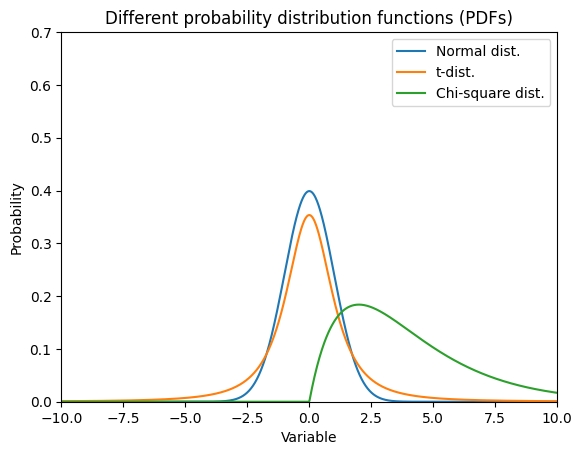

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

# Set the x-range
x_min = -10
x_max = 10

# Set the mean and S.D.
mean = 0
std = 1

# Array of x
x = np.linspace(x_min, x_max, 1000)

# Array of probability values for different distributions
y_norm_dist = norm.pdf(x, mean, std)   # SND: N(0, 1).
y_t_dist = t.pdf(x, 2)   # t-distribution of d.o.f. = 2.
y_chi2_dist = chi2.pdf(x, 4)   # Chi-square distribution of d.o.f. = 4.

# Plot
ax = plt.gca()

plt.xlim(x_min, x_max)
plt.ylim(0, 0.7)

plt.plot(x, y_norm_dist)
plt.plot(x, y_t_dist)
plt.plot(x, y_chi2_dist)

plt.xlabel('Variable')
plt.ylabel('Probability')
plt.legend(['Normal dist.', 't-dist.', 'Chi-square dist.'])
plt.title('Different probability distribution functions (PDFs)')

plt.show()


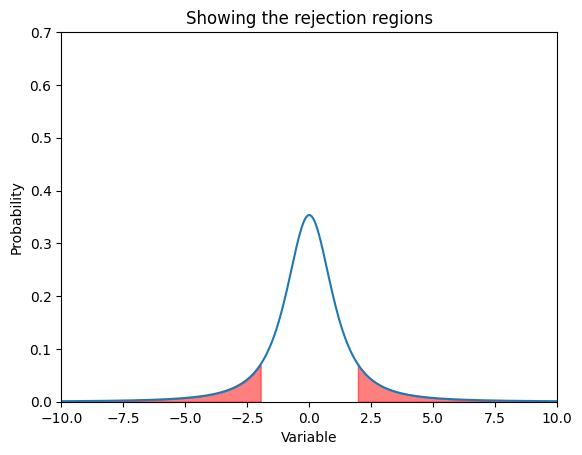

In [75]:
# Draw the rejection regions in a given distribution.

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

x1 = np.linspace(-10, -1.96, 100)
y1 = t.pdf(x1, 2)
plt.fill_between(x1, y1, color = 'red', alpha = 0.5)

x2 = np.linspace(1.96, 10, 100)
y2 = t.pdf(x2, 2)
plt.fill_between(x2, y2, color = 'red', alpha = 0.5)

# Plot
ax = plt.gca()

plt.xlim(x_min, x_max)
plt.ylim(0, 0.7)

# Choose the distribution in which you wanna draw the rejection regions
# plt.plot(x, y_norm_dist)
plt.plot(x, y_t_dist)
# plt.plot(x, y_chi2_dist)

plt.xlabel('Variable')
plt.ylabel('Probability')

plt.title('Showing the rejection regions')

plt.savefig("normal_dist.png", dpi = 400, transparent = True)
plt.show()
